# Framingham Heart study dataset

Introduction: 

The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as st

In [2]:
data = pd.read_csv("C:/Users/alekh/Desktop/framingham.csv")
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Variables:

male: male or female<br>
age: age of the patient<br>
currentSmoker: whether or not the patient is a current smoker<br>
cigsPerDay: the number of cigarettes that the person smoked on average in one day<br>
BPMeds: whether or not the patient was on blood pressure medication<br>
prevalentStroke: whether or not the patient had previously had a stroke<br>
prevalentHyp: whether or not the patient was hypertensive<br>
diabetes: whether or not the patient had diabetes<br>
totChol: total cholesterol level<br>
sysBP: systolic blood pressure<br>
diaBP: diastolic blood pressure<br>
BMI: Body Mass Index<br>
heartRate: heart rate<br>
glucose: glucose level<br>


In [3]:
print(data.shape)

(4240, 16)


The number of entries in the dataset: We have 4240 rows and 16 columns

In [4]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Checking for null values

In [5]:
data.isnull().values.any()

True

Checking for null values column wise

In [6]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Replacing null values with "0"

In [7]:
data.update(data[["education", "cigsPerDay","totChol","BMI","glucose","heartRate","BPMeds"]].fillna(0))

Rechecking for null values

In [22]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Distribution of male and female

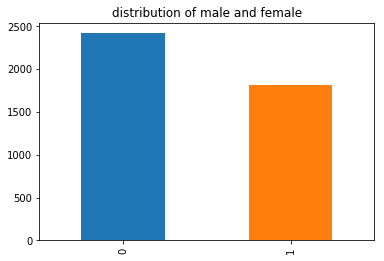

In [9]:
data['male'].value_counts().plot.bar(title="distribution of male and female")

Distribution of smokers and non smokers

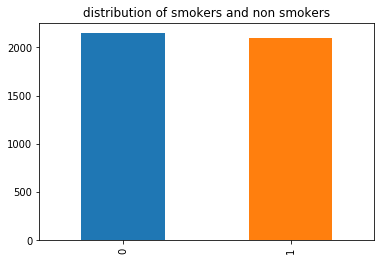

In [10]:
data['currentSmoker'].value_counts().plot.bar(title="distribution of smokers and non smokers")

Univariate distribution of the columns

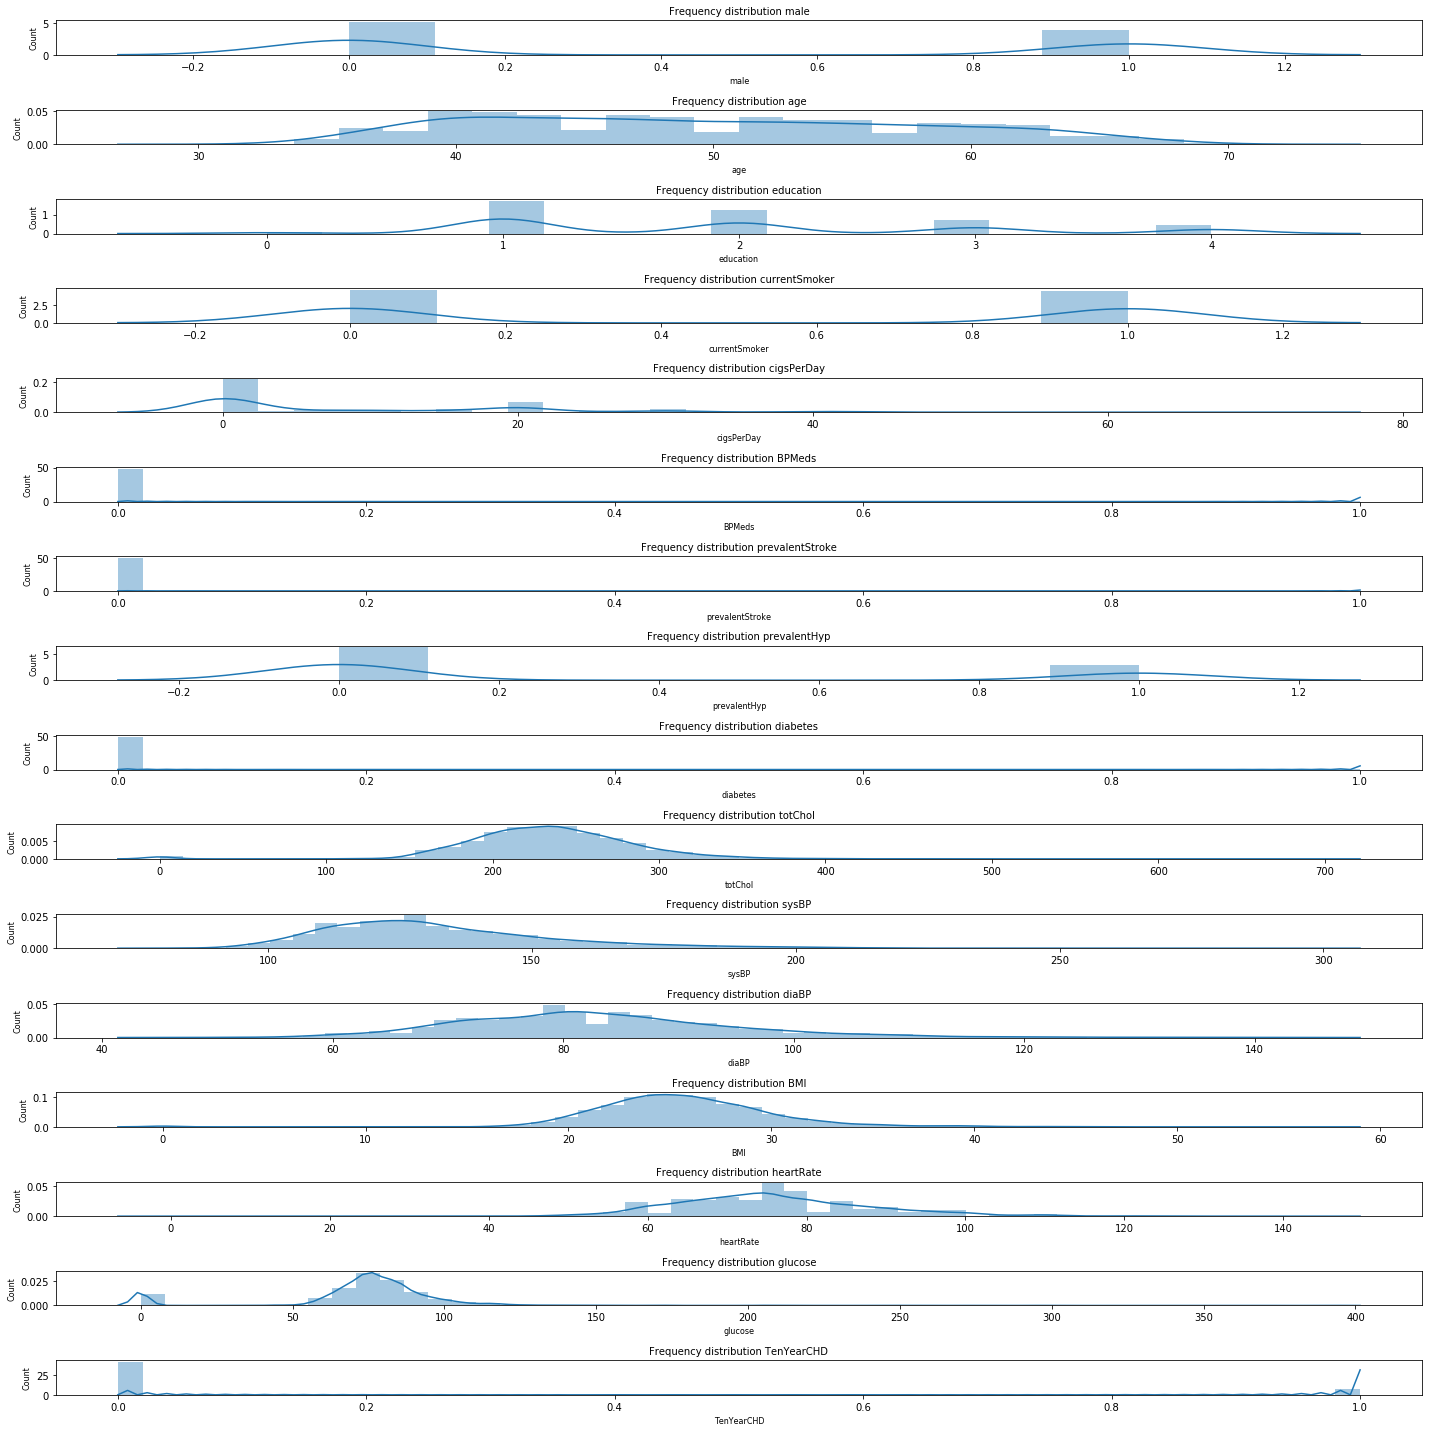

In [16]:
columnNames = list(data.head(0)) 
fig, ax = plt.subplots(len(columnNames), figsize=(20,20))

for i, col_val in enumerate(columnNames):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8) 
fig.tight_layout()  
plt.show()

Bivariate distribution for analyzing relationship between the columns

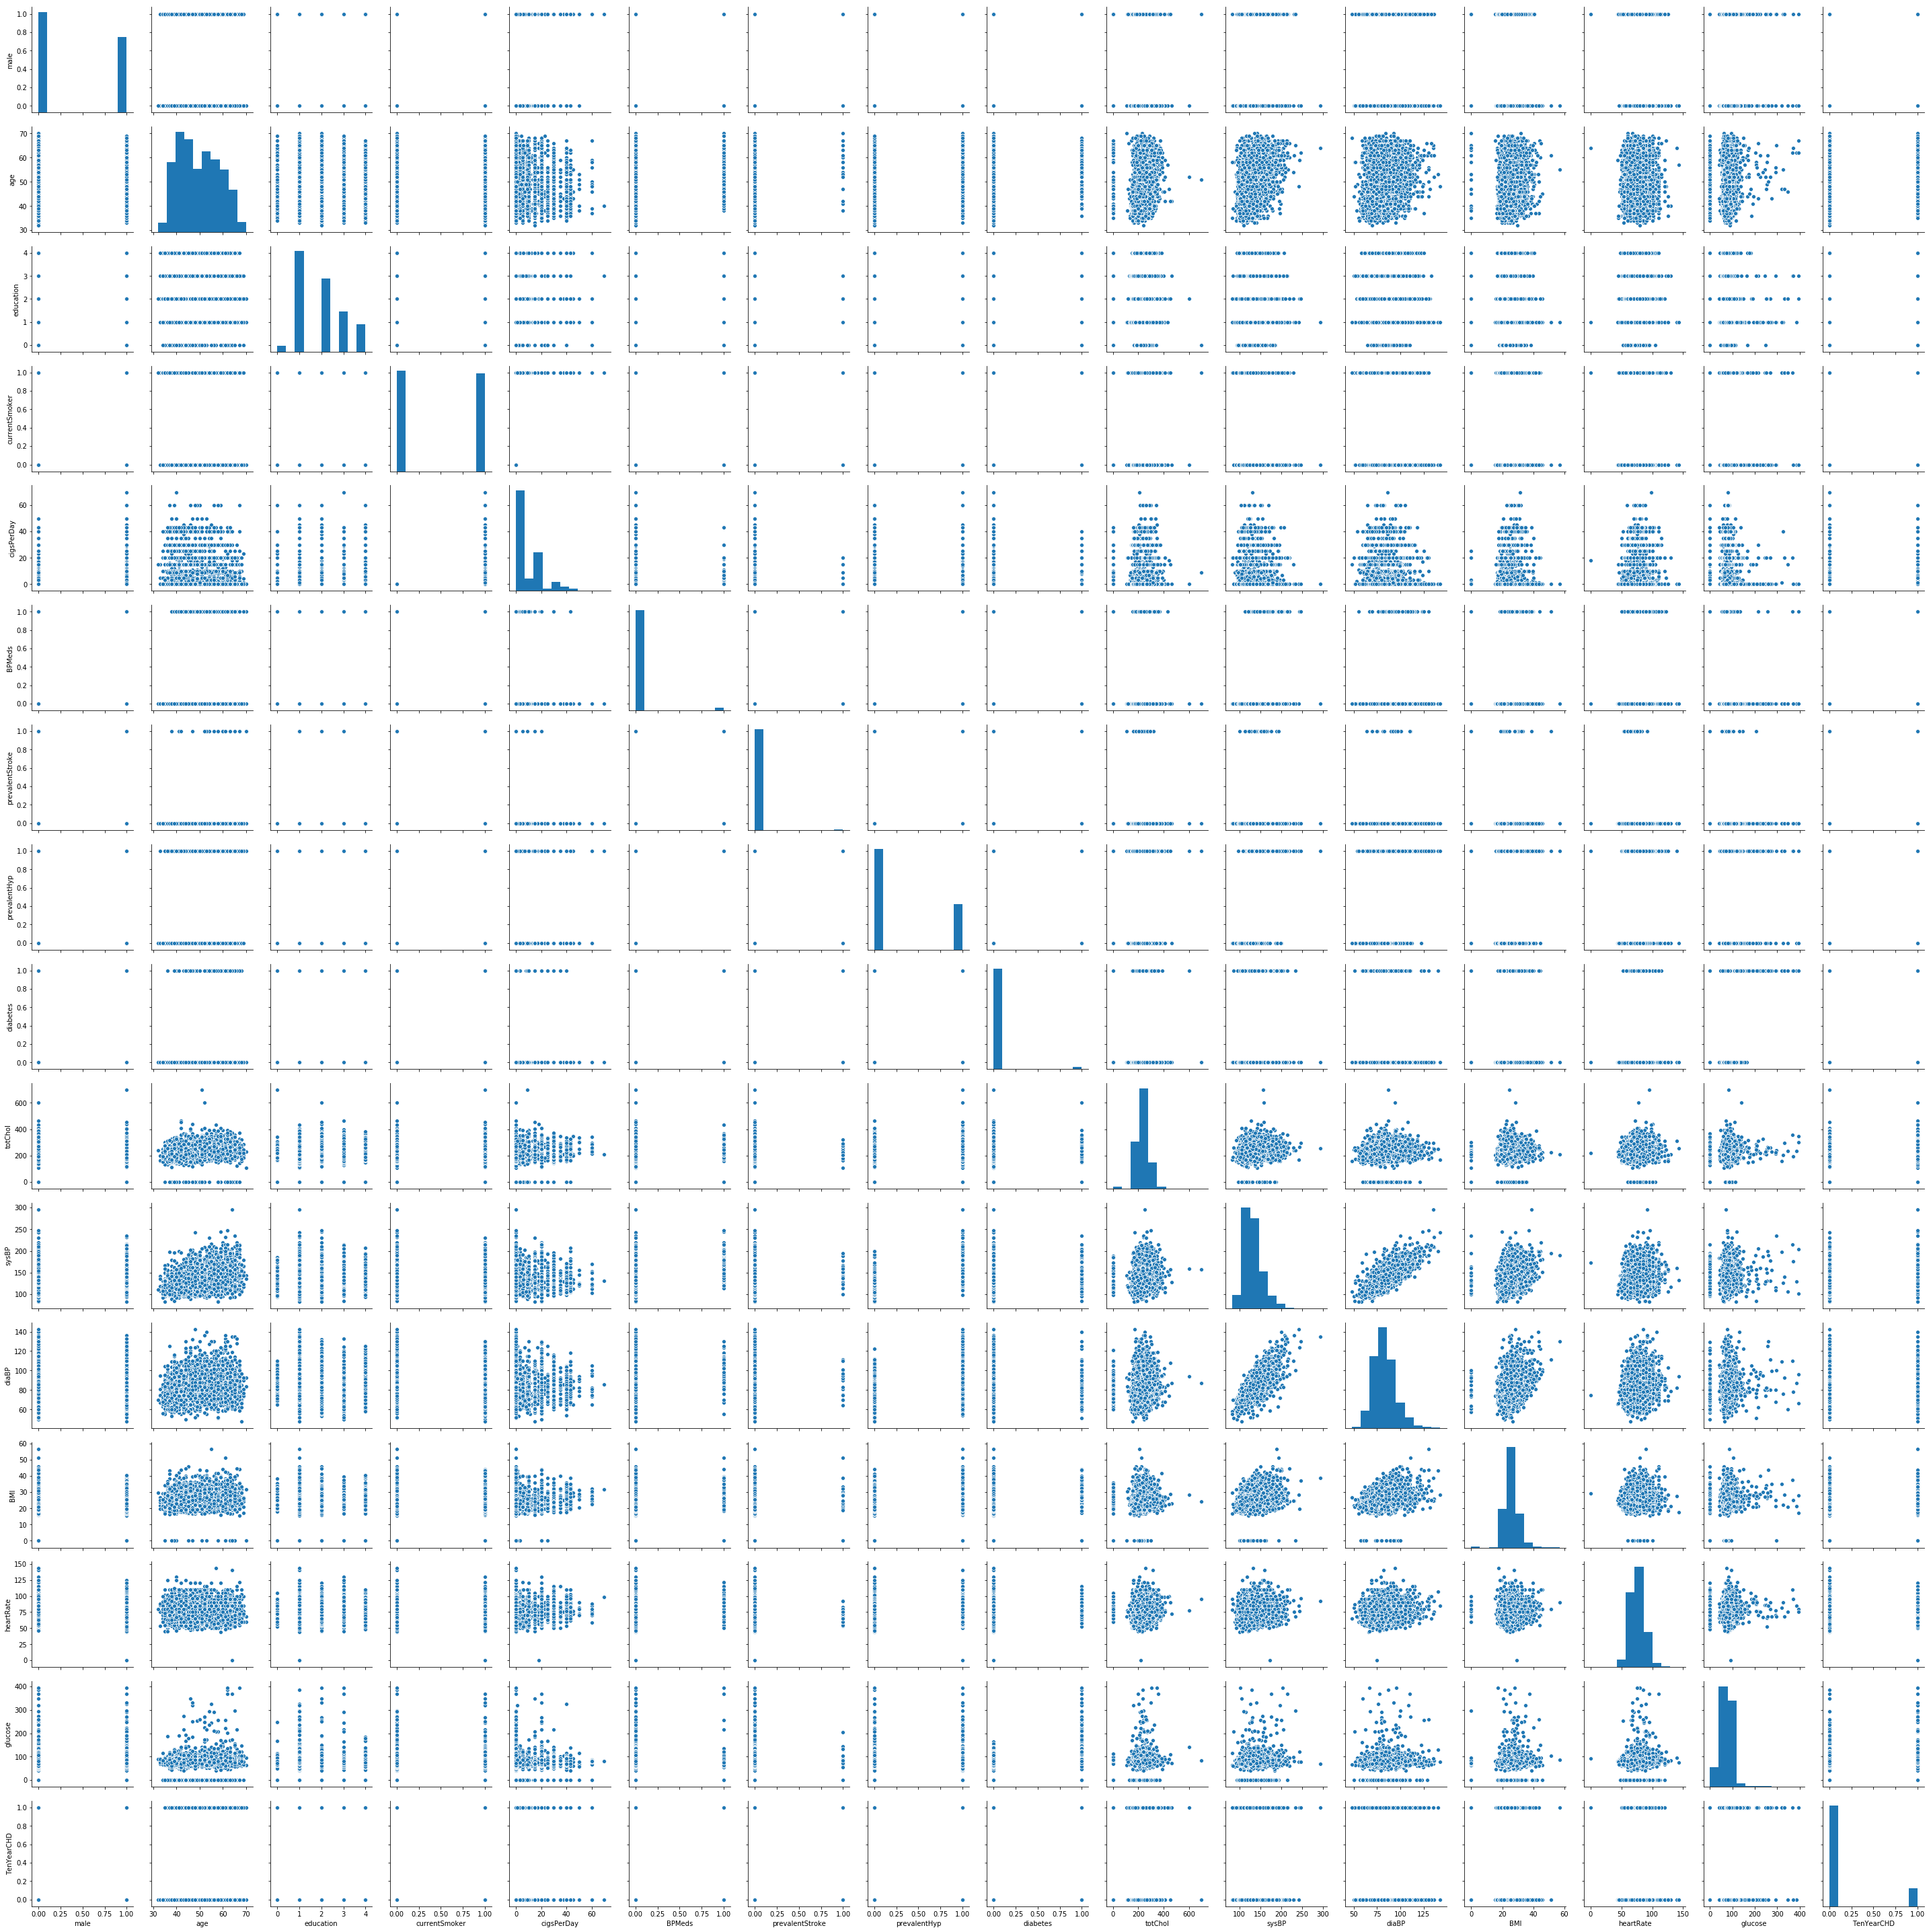

In [12]:
sns.pairplot(data)
plt.show()

The correlation matrix

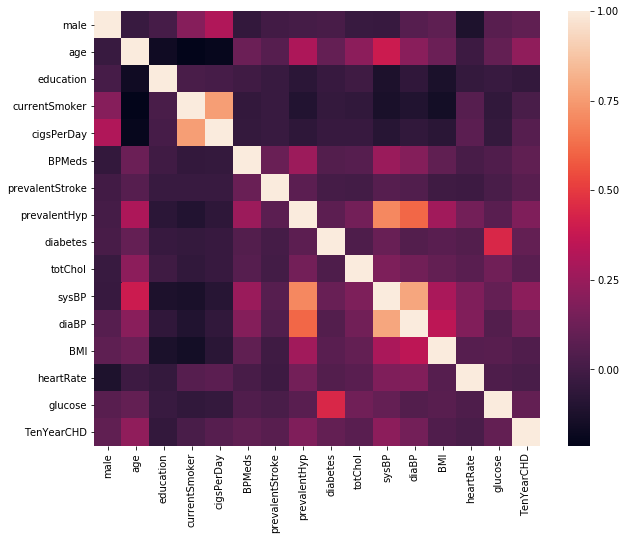

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Logistic Regression

In [18]:
from statsmodels.tools import add_constant as ac
data_constant = ac(data)
data_constant.head()

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=data.columns[:-1]
model=sm.Logit(data.TenYearCHD,data[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.395999
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4225
Method:                           MLE   Df Model:                           14
Date:                Sun, 10 Feb 2019   Pseudo R-squ.:                 0.07035
Time:                        17:33:21   Log-Likelihood:                -1679.0
converged:                       True   LL-Null:                       -1806.1
                                        LLR p-value:                 4.011e-46
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.3800      0.097      3.908      0.000       0.189       0.571
age                 0.0286      0.005      5.362      0.000       0.018       0.039
education          -0.1498      0.043     -3.509      0.000      -0.233      -0.066
currentSmoker      -0.2594      0.140     -1.855      0.064      -0.534       0.015
cigsPerDay          0.0231      0.006      4.114      0.000       0.012       0.034
BPMeds              0.4071      0.217      1.879      0.060      -0.018       0.832
prevalentStroke     0.7902      0.449      1.760      0.078      -0.090       1.670
prevalentHyp        0.9066      0.115      7.905      0.000       0.682       1.131
diabetes            0.8130      0.255      3.193      0.001       0.314       1.312
totChol            -0.0013      0.001     -1.514      0.130      -0.003       0.000
sysBP               0.0113      0.004      3.206      0.001       0.004       0.018
diaBP              -0.0233      0.006     -4.130      0.000      -0.034      -0.012
BMI                -0.0560      0.010     -5.539      0.000      -0.076      -0.036
heartRate          -0.0199      0.004     -5.548      0.000      -0.027      -0.013
glucose             0.0018      0.001      1.222      0.222      -0.001       0.005
===================================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by running the regression repeatedly until all attributes have P Values less than 0.05.